In [29]:
# main libraries
import pandas as pd
from matplotlib import pyplot as plt # try to use seaborn instead... 

# alternative libraries
import numpy as np # alternative to pandas
import seaborn as sns # (recommended) alternative to matplotlib

# other
# import os
import statistics # statistical functions
import re
# import random 
# import itertools
# import math 
# from sklearn import # machine learning library

'''
Sections:
-Libraries
-EDA
-Cleaning
-Data Manipulation
-Visualisation

# Casey's source for EDA: https://github.com/caseynator123/EDP_assigment2/blob/main/eda/eda.ipynb
'''

"\nSections:\n-Libraries\n-EDA\n-Cleaning\n-Data Manipulation\n-Visualisation\n\n# Casey's source for EDA: https://github.com/caseynator123/EDP_assigment2/blob/main/eda/eda.ipynb\n"

# Early Data Exploration

In [30]:
# read in data
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

data = pd.read_csv(url, sep="\t")

In [31]:
# numerical EDA stage 1
display(data)
data.describe()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [32]:
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# DATA CLEANING

In [33]:
# Errors to look out for... range errors, NaN values (Done), format errors

# NaN value (use * 1 to turn bool into numbers)
value = 0
data.fillna(value) # NOTE, METHODS NOT MUTATE THE DATAFRAME!!! USEFUL TO KNOW
# ALSO, value can be a dictionary instead... or a series?
data.notna()
data.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [34]:
# https://stackoverflow.com/questions/32464280/how-to-convert-currency-column-with-and-to-numbers
# format errors (could automate this by using regex to search for all non numerical/decimal point symbols...)

#use regex to check for formatting
#i.e., from Casey: books[~books["ISBN"].str.match(r"^(?=(?:\D*\d){9,10})|\d{9}X")]

print(data.dtypes)
data["item_numerical_price"] = data["item_price"].replace(r'[\$]','', regex=True).astype(float)

#alternatively, when dealing with strings and want to shortcut it
data["item_numerical_price"] = data["item_price"].str.replace("$", "").astype(float)
data["item_numerical_price"]

# https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
#can also index on the strings like so, i.e., for last three letters, or ?use conditions?: 
# ... BUT TBH, USE REGEX FOR ANY LEVEL OF COMPLEXITY
data["item_name"].str[-3:]

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


0       lsa
1       zze
2       tar
3       lsa
4       owl
       ... 
4617    ito
4618    ito
4619    owl
4620    owl
4621    owl
Name: item_name, Length: 4622, dtype: object

In [35]:
# range errors... (i.e., price 1000)? 

In [36]:
# inconsistency errors (i.e., unit price 1, quantity 2, total price 3)? 

In [37]:
# casefolding
# .str.upper()
data["item_name"].str.lower()

0                chips and fresh tomato salsa
1                                        izze
2                            nantucket nectar
3       chips and tomatillo-green chili salsa
4                                chicken bowl
                        ...                  
4617                            steak burrito
4618                            steak burrito
4619                       chicken salad bowl
4620                       chicken salad bowl
4621                       chicken salad bowl
Name: item_name, Length: 4622, dtype: object

In [38]:
# duplication errors? only on primary keys or candidate keys if not all columns
# data[data["order_id"].duplicated()] (turns out order_id is not the primary key)\
data.loc[data.duplicated()]

data[["order_id", "item_name"]].drop_duplicates() 

,order_id,item_name
0,1,Chips and Fresh Tomato Salsa
1,1,Izze
2,1,Nantucket Nectar
3,1,Chips and Tomatillo-Green Chili Salsa
4,2,Chicken Bowl
...,...,...
4614,1831,Bottled Water
4615,1832,Chicken Soft Tacos
4616,1832,Chips and Guacamole
4617,1833,Steak Burrito


# Data Manipulation

In [39]:
# sorting?
# biggest?
# smallest?
# counting?
# mean, median, mode, sum etc.?
# indexing, using .at, .loc etc. 
# group by?
# IMPORTANT, axis=1 argument does operation rowwise, instead of columnwise 

data["quantity"].max()
data["quantity"].min()
display(data[["quantity", "order_id"]])
display(data[["quantity", "order_id"]].mean(axis=1))
data["quantity"].median()
data["quantity"].mode()
data["quantity"].count()
data.quantity.std() #can use .col_name instead of ["col_name"]
data.quantity.unique()
data.quantity.idxmax()
data.quantity.idxmin()

data.quantity.value_counts() # This gives the distribution of quantity, so highly useful

,quantity,order_id
0,1,1
1,1,1
2,1,1
3,1,1
4,2,2
...,...,...
4617,1,1833
4618,1,1833
4619,1,1834
4620,1,1834


0         1.0
1         1.0
2         1.0
3         1.0
4         2.0
        ...  
4617    917.0
4618    917.0
4619    917.5
4620    917.5
4621    917.5
Length: 4622, dtype: float64

quantity
1     4355
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: count, dtype: int64

In [40]:
# sorting
data.sort_values(by="quantity", ascending=False)

,order_id,quantity,item_name,choice_description,item_price,item_numerical_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25
4152,1660,10,Bottled Water,NaN,$15.00,15.00
3887,1559,8,Side of Chips,NaN,$13.52,13.52
3599,1443,7,Bottled Water,NaN,$10.50,10.50
2441,970,5,Bottled Water,NaN,$7.50,7.50
...,...,...,...,...,...,...
1592,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25,11.25
1593,645,1,Chips and Tomatillo Green Chili Salsa,NaN,$2.95,2.95
1594,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25,9.25
1595,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25,11.25


In [41]:
# group by 
data.groupby(by="item_name")

#typically with .sum() at the end (ALWAYS NEEDS AN AGGREGATE FUNCTION TO PAIR)
#.counts() counts all non-null entities (WORKS WONDERS WITH GROUP BY)
#.nunique() to count the number of unique/distinct values
#.value_counts() returns series for the count of each unique entity (AVOID???) (DOESN'T WORK WITH SORTING)
#source: https://stackoverflow.com/questions/55494028/when-to-use-count-and-value-counts-in-pandas

data.groupby(by="item_name").count().sort_values(by="order_id", ascending=False).head(1)

,order_id,quantity,choice_description,item_price,item_numerical_price
item_name,,,,,
Chicken Bowl,726,726,726,726,726


In [42]:
# string matching in pandas
# MAKE SURE TO APPLY TEXT PREPROCESSING FIRST, particularly casefolding... maybe even fuzzy matching

data[data.item_name.str.contains(r'([a-zA-Z])\1', regex=True, na=False)] # regex solution
data[data.item_name.str.contains('Drink', regex=True, na=False)] # no regex for pure string sequences

#data[data.item_name.str.extract(r'([a-zA-Z])\1')]  # find a way to extract the regex string pattern maybe?

''' 
alternatively, use the .isin method
step 1) create a set of relevant names

step 2) apply this
.isin(set)
and voila!

This shows however, I need to do data exploration before just assuming regex is the answer, 
and ALWAYS consider what could go wrong
'''

C:\Users\andyd\AppData\Local\Temp\ipykernel_12032\1788340056.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[data.item_name.str.contains(r'([a-zA-Z])\1', regex=True, na=False)] # regex solution


' \nalternatively, use the .isin method\nstep 1) create a set of relevant names\n\nstep 2) apply this\n.isin(set)\nand voila!\n\nThis shows however, I need to do data exploration before just assuming regex is the answer, \nand ALWAYS consider what could go wrong\n'

In [43]:
'''
COMBINING DATA
https://realpython.com/pandas-merge-join-and-concat/
'''
 
# Merging two data frames!!!
right_data = pd.read_csv(url, sep="\t")

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
wierd_data = data.merge(right_data, on="order_id", how="outer", validate="many_to_many")

# to combine rows, use .concat()? .join()?  
# Many to One Join

#https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns
# How to avoid duplicate columns 
cols_to_use = right_data.columns.difference(data.columns)

wierd_data

wierd_data.drop(wierd_data.columns[0], axis=1, inplace=True)
'''

Complex Implementation 
dfNew = df.merge(df2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

dfNew.drop(dfNew.filter(regex='_y$').columns, axis=1, inplace=True)
'''

wierd_data

''' FULL EXAMPLE OF DEALING WITH OVERLAPPING COLUMNS 
combined_scores = math_scores.merge(science_scores, on="name", how="outer", suffixes=("","_dup"))
combined_scores["school"] = combined_scores["school"].fillna(combined_scores["school_dup"])
combined_scores.drop("school_dup", axis=1, inplace=True)
combined_scores
SIKE, BETTER OPTION IS...:
combined_scores = math_scores.merge(science_scores, on=["name","school"], how="outer")
Doesn't deal with NAs BUT it doesn't eliminate overlaps
'''

#Other merges to take note of: (SEE BELOW FOR FULL EXAMPLES)
#.merge_asof(),    merge over intervals 




' FULL EXAMPLE OF DEALING WITH OVERLAPPING COLUMNS \ncombined_scores = math_scores.merge(science_scores, on="name", how="outer", suffixes=("","_dup"))\ncombined_scores["school"] = combined_scores["school"].fillna(combined_scores["school_dup"])\ncombined_scores.drop("school_dup", axis=1, inplace=True)\ncombined_scores\nSIKE, BETTER OPTION IS...:\ncombined_scores = math_scores.merge(science_scores, on=["name","school"], how="outer")\nDoesn\'t deal with NAs BUT it doesn\'t eliminate overlaps\n'

In [44]:
'''
# You can do this "approximate merge" using pd.merge_asof,
# Which takes a numeric column to merge on, and
# does a left merge where it matches each row in the left
# DataFrame to a row in the right dataFrame with the
# corresponding value.
# "backward" here refers to: for a value between
# 80 and 90, look "backward" at the smaller number,
# rather than "forward" at the bigger number, for matching
# the math_score to a grade.
display(
    pd.merge_asof(
        math_scores.sort_values(by="math_score"),
        score_thresholds.sort_values(by="math_score"),
        on="math_score",
        direction="backward",
    )     
)





'''

'\n# You can do this "approximate merge" using pd.merge_asof,\n# Which takes a numeric column to merge on, and\n# does a left merge where it matches each row in the left\n# DataFrame to a row in the right dataFrame with the\n# corresponding value.\n# "backward" here refers to: for a value between\n# 80 and 90, look "backward" at the smaller number,\n# rather than "forward" at the bigger number, for matching\n# the math_score to a grade.\ndisplay(\n    pd.merge_asof(\n        math_scores.sort_values(by="math_score"),\n        score_thresholds.sort_values(by="math_score"),\n        on="math_score",\n        direction="backward",\n    )     \n)\n\n\n\n\n\n'

In [45]:
# Time Complexity Analysis
from time import time

def time_this(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f"Function {func.__name__!r} executed in {(t2-t1):.4f}s")
        return result

    return wrap_func

@time_this
def some_function():
    print("Test")

some_function()

Test
Function 'some_function' executed in 0.0000s


In [46]:
data_copy = data.copy()

# VECTORISED/SPEEDY CASE WHEN
# even orders double their quantity, odd orders halve
data_copy["special"] = np.where(
    data_copy["order_id"] % 2 == 0, data["quantity"] * 2, data["quantity"]/2
) #condition, satisfaction case, unsatisfaction case

data_copy[["order_id", "quantity", "special"]]

,order_id,quantity,special
0,1,1,0.5
1,1,1,0.5
2,1,1,0.5
3,1,1,0.5
4,2,2,4.0
...,...,...,...
4617,1833,1,0.5
4618,1833,1,0.5
4619,1834,1,2.0
4620,1834,1,2.0


In [47]:
# DF.query(CONDITION)
# i.e., df.query('school == "Central High" & name == "Alice"')
# works with all SQL commands I think, like, 'school in ["entry1", "entry2"]'



'''
Other:
.eval()

-> To exchange columns and rows or whatever 
.melt()
long_data = pd.melt(
    df,
    id_vars=["name", "school", "favorite_color"],
    var_name="test_name",
    value_name="score",
)
long_data

->Reverse the melt
.pivot() 
wide_data = long_data.pivot(
    index=["name", "school", "favorite_color"], columns=["test_name"]
).reset_index()


'''

'\nOther:\n.eval()\n\n-> To exchange columns and rows or whatever \n.melt()\nlong_data = pd.melt(\n    df,\n    id_vars=["name", "school", "favorite_color"],\n    var_name="test_name",\n    value_name="score",\n)\nlong_data\n\n->Reverse the melt\n.pivot() \nwide_data = long_data.pivot(\n    index=["name", "school", "favorite_color"], columns=["test_name"]\n).reset_index()\n\n\n'

# Visualisation

In [48]:
'''
-line plot
-Scatter plot
-Box plot
-Dot plot
-Histogram
-Bar chart
-Pie chart

For Matplotlib: https://matplotlib.org/stable/api/axes_api.html
'''

# First, we will generate some random time-series data to plot:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
timeseries_df = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"]).rolling(7).mean()

Text(0.5, 1.0, 'Dependent vs Time')

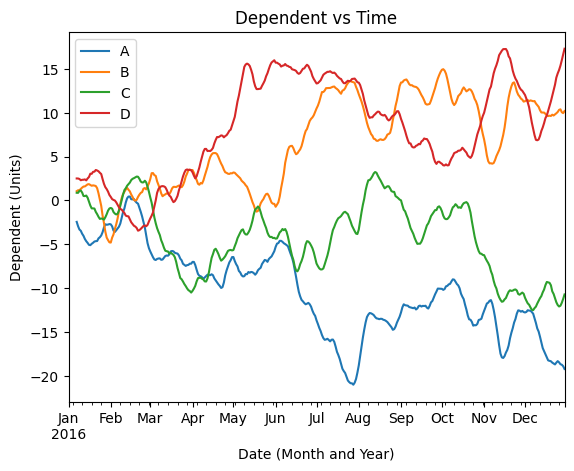

In [49]:
# General plotting for matplotlib

ax = timeseries_df.plot()

ax.set_xlabel("Date (Month and Year)")
ax.set_ylabel("Dependent (Units)")
ax.set_title("Dependent vs Time")



Text(0, 0.5, 'DV')

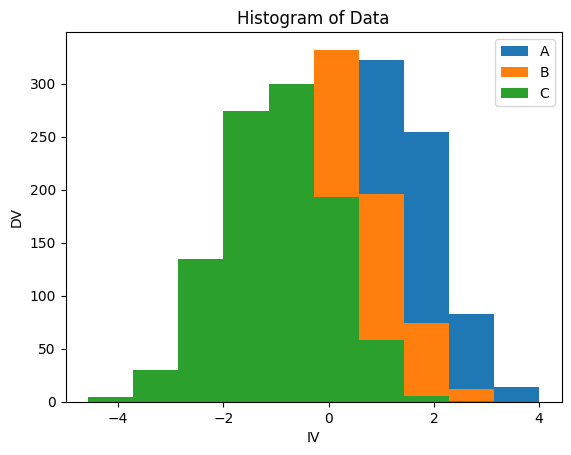

In [54]:
# Histogram using matplotlib
from importlib import reload
plt=reload(plt)
hist_df = pd.DataFrame(
    {
        "A": rs.randn(1000) + 1,
        "B": rs.randn(1000),
        "C": rs.randn(1000) - 1
    }
)

ax = hist_df.plot.hist()
ax.set_title("Histogram of Data")
ax.set_xlabel("IV")
ax.set_ylabel("DV")

# Time Series

In [ ]:
'''
Mean smoothing
Seasonality
etc.
'''